In [1]:
import pandas as pd
import numpy as np
import os

# Set working dir to project root dir
os.chdir(os.path.abspath(os.path.join(os.getcwd(), "..")))
print(f"Changed working directory to: {os.getcwd()}")

# Set abs path to data
project_root = "/Users/oliulv/Documents/foak"
data_path = os.path.join(project_root, "data", "SOLUSDT_1m_1h-pump05_200811_250302.csv")

# Load data into df
df = pd.read_csv(data_path, parse_dates=["timestamp"])
df.head()

Changed working directory to: /Users/oliulv/Documents/foak


,timestamp,open,high,low,close,volume,num_trades,taker_buy_base,taker_buy_quote,label,...,volatility_cluster,buy_sell_ratio,bid_ask_spread,depth_imbalance,fractal_dimension,fib_retrace_38,fib_retrace_50,order_flow_imbalance,rolling_kurtosis,lunar_phase
0,2020-08-11 06:00:00,2.8500,2.8500,2.8500,2.8500,3.60,1.0,3.60,10.260000,0,...,NaN,3.600000e+09,0.000000,1.000000,NaN,NaN,NaN,1.000000,NaN,0.37931
1,2020-08-11 06:01:00,2.8500,2.8500,2.8500,2.8500,0.00,0.0,0.00,0.000000,0,...,NaN,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.37931
2,2020-08-11 06:02:00,2.8500,2.8500,2.8500,2.8500,0.00,0.0,0.00,0.000000,0,...,NaN,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.37931
3,2020-08-11 06:03:00,3.4699,3.4700,3.0003,3.0003,3410.31,7.0,3376.90,10199.382689,0,...,NaN,1.010745e+02,0.156551,0.990203,NaN,NaN,NaN,0.980406,NaN,0.37931
4,2020-08-11 06:04:00,3.1852,3.1852,3.1852,3.1852,313.95,1.0,313.95,999.993540,0,...,NaN,3.139500e+11,0.000000,1.000000,NaN,NaN,NaN,1.000000,NaN,0.37931


In [2]:
from utils.model.model_manager import ModelManager

# Init manager
symbol = "SOLUSDT"
start_date = "2020-08-11"
end_date = "2025-03-02"
manager = ModelManager(symbol, start_date, end_date)

# Load data into manager
manager.load_data(data_path)

# Prepare and split data
test_window_days = 30
manager.split_data(test_window_days)

🕵️♂️ Dataset loaded successfully
📊 Data split completed


(             open      high       low     close    volume  num_trades  \
 0          2.8500    2.8500    2.8500    2.8500     3.600         1.0   
 1          2.8500    2.8500    2.8500    2.8500     0.000         0.0   
 2          2.8500    2.8500    2.8500    2.8500     0.000         0.0   
 3          3.4699    3.4700    3.0003    3.0003  3410.310         7.0   
 4          3.1852    3.1852    3.1852    3.1852   313.950         1.0   
 ...           ...       ...       ...       ...       ...         ...   
 2351151  239.0900  239.2100  239.0200  239.2000   593.130      1081.0   
 2351152  239.2000  239.2500  239.1600  239.1700   620.212       444.0   
 2351153  239.1800  239.1800  238.8000  238.8100  2038.322      1290.0   
 2351154  238.8000  238.8100  238.6500  238.6500  1995.293      1524.0   
 2351155  238.6600  238.6700  238.3000  238.3100  2835.790      2169.0   
 
          taker_buy_base  taker_buy_quote    1m_roc  30m_volatility  ...  \
 0                 3.600        10

In [3]:
# Config model with default params
manager.configure_model()

# Fit and evaluate model on data
manager.fit_and_evaluate()

# Tune threshold
manager.tune_threshold(min_recall=0.5, min_precision=0.6)


🏋️ Training model...

🎯 Tuning threshold...
Optimal threshold: 0.5278


np.float64(0.5277577119969568)

In [4]:
# Get and print merics
metrics = manager.get_metrics()
print(metrics)


📊 Model Performance Report
Optimal Threshold: 0.5278
AUC-ROC Score: 0.9982

Overall Metrics:
Accuracy:  0.9982
Precision: 0.9980
Recall:    0.9982
F1-Score:  0.9981

Class 0 Metrics:
Precision: 0.9989
Recall:    0.9993
F1-Score:  0.9991

Class 1 Metrics:
Precision: 0.6125
Recall:    0.5052
F1-Score:  0.5537

Using raw probabilities
Classification threshold: 0.5278
{'accuracy': 0.9981713386264207, 'precision': 0.9980192917639488, 'recall': 0.9981713386264207, 'f1': 0.9980837018229631, 'auc_roc': np.float64(0.9981655492541655), 'optimal_threshold': np.float64(0.5277577119969568), 'precision_0': 0.9988868532733471, 'recall_0': 0.9992808092056422, 'f1_0': 0.9990837924035952, 'precision_1': 0.6125, 'recall_1': 0.5051546391752577, 'f1_1': 0.5536723163841808}



🎯 Generating SHAP analysis...


/Users/oliulv/Documents/foak/venv/lib/python3.12/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


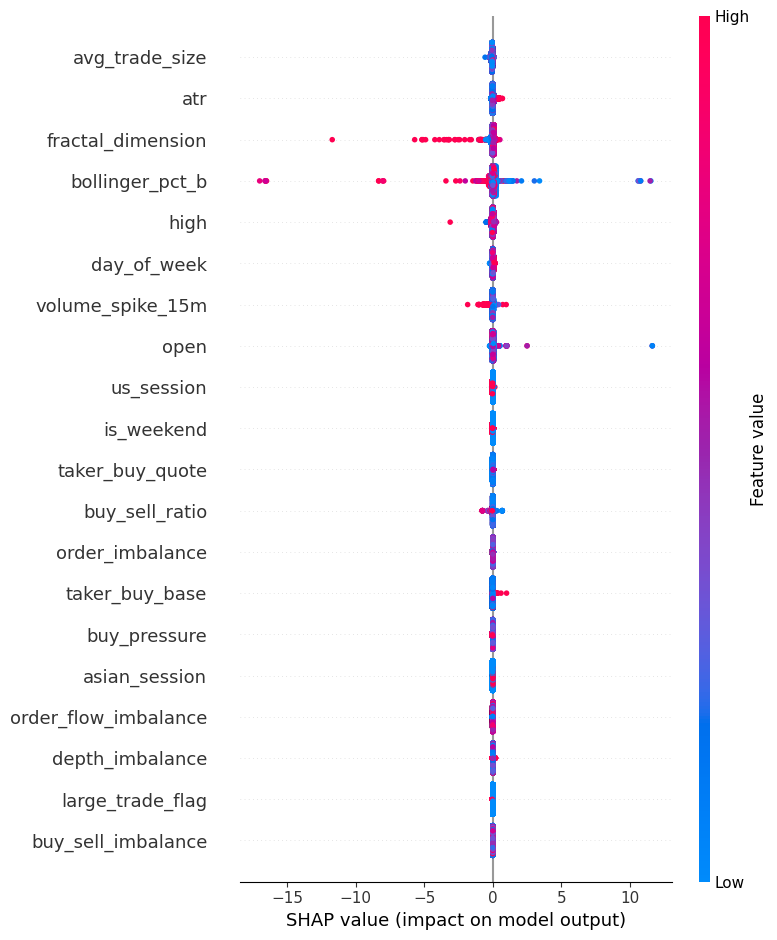


📈 Calculating feature importance...


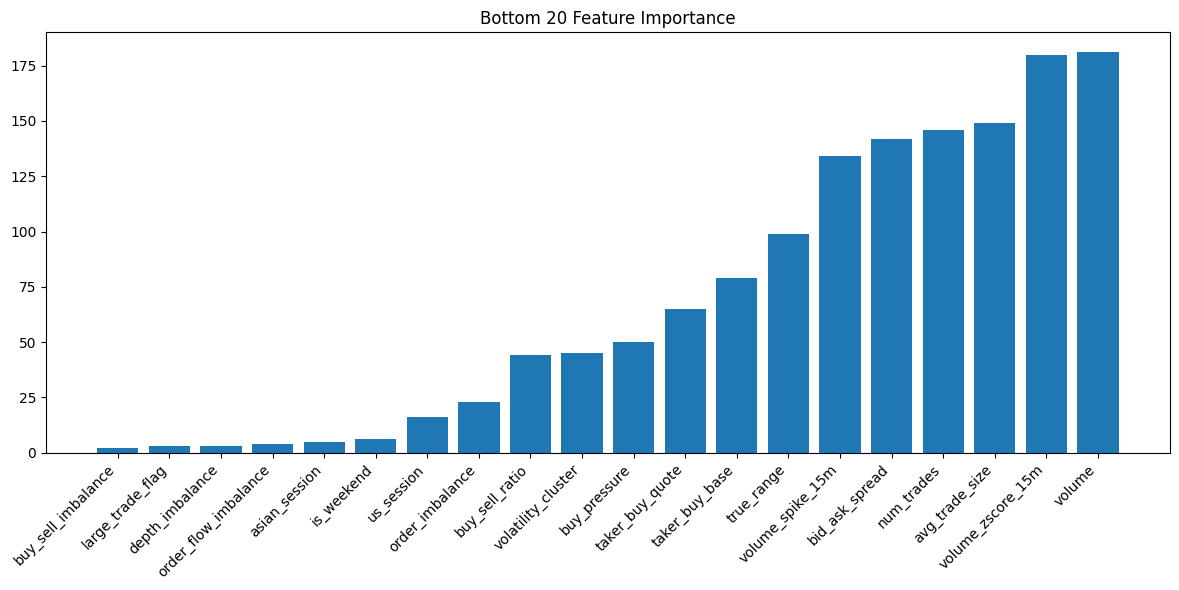

Found existing experiment
Identical result already exists for experiment ID: 23
Logged feature importance for experiment ID: 23


In [5]:
# Get and plot shap analysis
shap_values = manager.shap_analysis(show_bottom=True, n_features=20)

# Get and plot feature analysis
lgbm_values = manager.feature_importance(show_bottom=True, n_features=20)

# Init tracker
from utils.model.experiment_tracker import ExperimentTracker

# Log experiment, results, and feature analysis metrics
with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="1m",
        target_variable="1h-pump05",
        hyperparameters=manager.model.get_params(),
        features=manager.X_train.columns.tolist()
    )

    # Log experiment results
    results = tracker.log_results(experiment, metrics, test_window_days)

    # Log feature analysis metrics
    tracker.log_feature_importance(experiment, results, shap_values, lgbm_values)

In [ ]:
from utils.model.walk_forward import WalkForwardAnalyzer

# Store org params for logging
org_params = manager.model.get_params()

# Init wf
wf = WalkForwardAnalyzer(
    0.3,
    0.07,
    manager.optimal_threshold)

# Config model for wf
manager.configure_walk_forward_model()

# Prepare featuers
X = manager.df.drop(columns=["label"])
y = manager.df["label"]

# wf val
predictions, true_labels, metrics_history = wf.validate(
    manager.model,
    X,
    y)

In [ ]:
from utils.model.experiment_tracker import ExperimentTracker

# Initialize tracker

with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="1m",
        target_variable="1h-pump05",
        hyperparameters=org_params,
        features=manager.X_train.columns.tolist()
    )

    # Log results
    tracker.log_results(experiment, metrics, test_window_days)

    # Log wf val results
    tracker.log_walk_forward_results(experiment, metrics_history, 0.3, 0.07)

In [ ]:
wf.plot_metrics_over_time()